# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 2:</center>
### <center> Propiedades en Venta </center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as skp

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from preprocessing import preprocesamiento

from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_classification
from collections import defaultdict
from sklearn.model_selection import GridSearchCV

import plotly.graph_objects as go
%matplotlib inline


from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import visualkeras
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/home/lucia/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2022-12-08 22:42:30.252102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 22:42:30.403091: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 22:42:30.403114: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on 

Descargo los datos

In [2]:
_x_train_model = pd.read_csv('./DataSet/x_train')
_x_train_model.drop(columns=['Unnamed: 0'],inplace=True)
_y_train_model = pd.read_csv('./DataSet/y_train')
_y_train_model.drop(columns=['Unnamed: 0'],inplace=True)
_x_test_model = pd.read_csv('./DataSet/x_test')
_x_test_model.drop(columns=['Unnamed: 0'],inplace=True)
_y_test_model = pd.read_csv('./DataSet/y_test')
_y_test_model.drop(columns=['Unnamed: 0'],inplace=True)
_y_train_model.rename(columns={'0':'pxm2'}, inplace=True)
_y_test_model.rename(columns={'0':'pxm2'}, inplace=True)

# Redes neuronales

Construir dos modelos de redes neuronales, uno para regresión y otro para clasificación,
considerando los datasets creados en el TP1. Mejorar estos modelos de redes
neuronales a través de la búsqueda de arquitectura e hiperparámetros adecuados. Se
pide:

● Regresión: predecir el precio de la propiedad y utilizar como métrica de
evaluación el error cuadrático medio.

● Clasificación: predecir el atributo tipo_precio creado en el TP 1 y utilizar como
métricas precisión, recall y F1-Score.


# Modelo de Redes Neuronales para regresión

Los hiperparametros a buscar son los siguientes:

- **Función de activación:** Usamos relu
- **Cantidad de capas:** Es la cantidad de capas que tendrá la red neuronal. Tendremos una capa input y una capa de salida.
- **Cantidad de neuronas por capa:** Tendremos una neurona en la capa de salida porque queremos predecir un valor numerico. En la capa de entrada tendremos 6 neuronas.
- **Optimizador:** Un optimizador es una implementación concreta del algoritmo de descenso por gradiente dentro de backpropagation.
    - SGD (Stochastic Gradient Descent): Backpropagation simple, sin ningún tipo de optimización. 
    - Adam (Adaptive moment estimation): Hace un seguimiento de una media de decaimiento exponencial de gradientes pasados y de gradientes cuadrados pasados.
- **Función de perdida:** Es la función utilizada por el optimizador para minimizar. En regresion utilizaremos Mean Absolute Error (MAE)
- **Learning rate o tasa de aprendizaje:** Indica qué tan rápido se va descediendo en la función de costo, qué tan rápido va acercandose al minimo local o global.
- **Metricas:** Se van calculando en cada iteracion o batch. Utilizaremos Mean Squared Error (MSE) y Mean Absolute Error (MAE).
- **Cantidad de epochs:** Es la cantidad de iteraciones que tendrá el entrenamiento.

Ejecutamos una copia de los modelos

In [3]:
x_train = _x_train_model.copy()
y_train = _y_train_model.copy()
x_test = _x_test_model.copy()
y_test = _y_test_model.copy()

In [4]:
x_train.head()

,latitud,longitud,ambientes,dormitorios,superficie_cubierta,comuna,Departamento,PH
0,-34.583010,-58.481533,4.0,3.0,70.0,15,1.0,0.0
1,-34.660079,-58.485894,6.0,4.0,275.0,9,0.0,0.0
2,-34.581856,-58.425088,3.0,2.0,97.0,14,1.0,0.0
3,-34.607547,-58.442194,2.0,1.0,42.0,6,1.0,0.0
4,-34.607416,-58.509680,2.0,1.0,38.0,11,1.0,0.0


In [5]:
y_train.head()

,pxm2
0,2911.392405
1,671.428571
2,2546.391753
3,1733.333333
4,2804.878049


In [6]:
x_train.shape

(58133, 8)

Normalizo datos

In [7]:
x_train_red = x_train.iloc[:, 0:6]
x_train_norm = (x_train_red - x_train_red.mean())/x_train_red.std()
x_train_norm.head()

,latitud,longitud,ambientes,dormitorios,superficie_cubierta,comuna
0,0.501718,-1.122143,0.895188,1.112654,-0.086764,1.271560
1,-2.412422,-1.237399,2.384149,2.110384,3.243882,0.044010
2,0.545327,0.369634,0.150707,0.114923,0.351906,1.066968
3,-0.426107,-0.082471,-0.593774,-0.882808,-0.541681,-0.569765
4,-0.421158,-1.866017,-0.593774,-0.882808,-0.606670,0.453193


In [8]:
x_test_red = x_test.iloc[:, 0:6]
x_test_norm = (x_test_red - x_test_red.mean())/x_test_red.std()
x_test_norm.head()

,latitud,longitud,ambientes,dormitorios,superficie_cubierta,Departamento
0,0.736100,0.852283,0.871830,1.091760,1.474945,0.415401
1,1.964042,-0.548882,0.871830,1.091760,0.342862,0.415401
2,0.174311,1.184193,0.871830,1.091760,0.703816,0.415401
3,-1.233172,0.169444,-1.309095,-0.854592,-0.690780,0.415401
4,0.170750,1.617522,0.144855,0.118584,1.327282,0.415401


+ Transformo los set de datos

In [9]:
sscaler = StandardScaler()
sscaler.fit(pd.DataFrame(x_train_norm))

StandardScaler()

In [10]:
x_train_transform = sscaler.transform(pd.DataFrame(x_train_norm))
x_test_transform = sscaler.transform(pd.DataFrame(x_test_norm))

In [11]:
x_train_transform[0:5]

array([[ 0.50172268, -1.12215239,  0.89519544,  1.11266314, -0.0867647 ,
         1.27157065],
       [-2.41244287, -1.23741004,  2.38416976,  2.11040252,  3.24390971,
         0.04401013],
       [ 0.54533212,  0.36963696,  0.15070829,  0.11492376,  0.35190949,
         1.06697723],
       [-0.42611094, -0.08247136, -0.59377887, -0.88281562, -0.54168608,
        -0.56977013],
       [-0.42116132, -1.86603329, -0.59377887, -0.88281562, -0.60667485,
         0.45319697]])

# Con dos capas

## Modelo 1

In [12]:
d_in=6
d_out=1

modelo_1 = keras.Sequential([
    keras.layers.Dense(6,input_shape=(d_in,), activation="relu"),
    
    keras.layers.Dense(d_out)])

2022-12-08 22:42:33.997261: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 22:42:33.997290: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 22:42:33.997320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucia-UbuntuNotebook): /proc/driver/nvidia/version does not exist
2022-12-08 22:42:33.997592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
modelo_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [14]:
modelo_1.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01), 
      loss='mae', 
      metrics=['mse','mae'], 
)

In [16]:
# Entrenamiento del modelo
cant_epochs = 100
historia_modelo_1 = modelo_1.fit(x_train_transform,y_train,epochs=cant_epochs,batch_size=10,verbose=2)

Epoch 1/100
5814/5814 - 8s - loss: 528.1580 - mse: 691934.0000 - mae: 528.1580 - 8s/epoch - 1ms/step
Epoch 2/100
5814/5814 - 7s - loss: 526.9576 - mse: 689640.0625 - mae: 526.9576 - 7s/epoch - 1ms/step
Epoch 3/100
5814/5814 - 8s - loss: 526.8239 - mse: 691614.8750 - mae: 526.8239 - 8s/epoch - 1ms/step
Epoch 4/100
5814/5814 - 7s - loss: 526.5167 - mse: 689669.9375 - mae: 526.5167 - 7s/epoch - 1ms/step
Epoch 5/100
5814/5814 - 7s - loss: 526.4987 - mse: 689328.1250 - mae: 526.4987 - 7s/epoch - 1ms/step
Epoch 6/100
5814/5814 - 7s - loss: 526.8333 - mse: 689287.6875 - mae: 526.8333 - 7s/epoch - 1ms/step
Epoch 7/100
5814/5814 - 8s - loss: 526.6851 - mse: 690707.0625 - mae: 526.6851 - 8s/epoch - 1ms/step
Epoch 8/100
5814/5814 - 8s - loss: 526.3092 - mse: 688104.6875 - mae: 526.3092 - 8s/epoch - 1ms/step
Epoch 9/100
5814/5814 - 8s - loss: 526.4319 - mse: 691266.9375 - mae: 526.4319 - 8s/epoch - 1ms/step
Epoch 10/100
5814/5814 - 8s - loss: 526.1762 - mse: 689331.5625 - mae: 526.1762 - 8s/epoch 

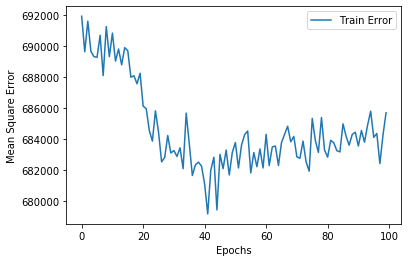

In [17]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.plot(range(cant_epochs), historia_modelo_1.history['mse'], label='Train Error')
plt.legend()

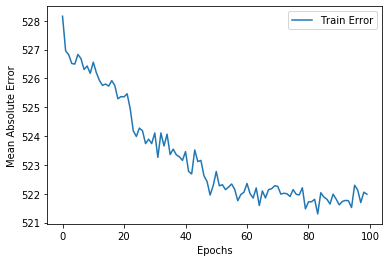

In [18]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.plot(range(cant_epochs), historia_modelo_1.history['mae'], label='Train Error')
plt.legend()

In [19]:
y_pred = modelo_1.predict(x_test_transform)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")

455/455 [==============================] - 1s 1ms/step
Error absoluto medio 549.9630450724737
Error cuadrático medio 634414.3136043805


La metrica del error cuadratico medio se encuentra en un rango entre 685.000 y 691.000, lo cual no es un muy buen resultado.

Comparando la prediccion con el target de test, obtenemos como resultado un valor aprox 634.414

In [45]:
dump(modelo_1, './Modelos_TP2/RedesNeuronalesRegresion1.joblib')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
......mean_metric_wrapper_1
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2022-12-08 23:57:05        22408
config.json                                    2022-12-08 23:57:05         1775
metadata.json                                  2022-12-08 23:57:05           64


['./Modelos_TP2/RedesNeuronalesRegresion1.joblib']

## Modelo 2

Veamos que ocurre si modificamos el learning rate

In [20]:
d_in=6
d_out=1

modelo_2 = keras.Sequential([
    keras.layers.Dense(6,input_shape=(d_in,), activation="relu"),
    
    keras.layers.Dense(d_out)])

In [21]:
modelo_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [22]:
modelo_2.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.001), 
      loss='mae', 
      metrics=['mse','mae'], 
)

In [23]:
# Entrenamiento del modelo
cant_epochs = 100
historia_modelo_2 = modelo_2.fit(x_train_transform,y_train,epochs=cant_epochs,batch_size=20,verbose=2)

Epoch 1/100
2907/2907 - 4s - loss: 2350.8071 - mse: 6493768.0000 - mae: 2350.8071 - 4s/epoch - 1ms/step
Epoch 2/100
2907/2907 - 4s - loss: 1952.6487 - mse: 5005727.5000 - mae: 1952.6487 - 4s/epoch - 1ms/step
Epoch 3/100
2907/2907 - 4s - loss: 623.3842 - mse: 965223.3750 - mae: 623.3843 - 4s/epoch - 1ms/step
Epoch 4/100
2907/2907 - 4s - loss: 568.6291 - mse: 808141.9375 - mae: 568.6291 - 4s/epoch - 1ms/step
Epoch 5/100
2907/2907 - 4s - loss: 565.1473 - mse: 796485.3125 - mae: 565.1473 - 4s/epoch - 1ms/step
Epoch 6/100
2907/2907 - 4s - loss: 564.4573 - mse: 792231.3750 - mae: 564.4573 - 4s/epoch - 1ms/step
Epoch 7/100
2907/2907 - 4s - loss: 563.9270 - mse: 790733.0625 - mae: 563.9270 - 4s/epoch - 1ms/step
Epoch 8/100
2907/2907 - 4s - loss: 563.0449 - mse: 788658.2500 - mae: 563.0449 - 4s/epoch - 1ms/step
Epoch 9/100
2907/2907 - 4s - loss: 561.8815 - mse: 786668.9375 - mae: 561.8815 - 4s/epoch - 1ms/step
Epoch 10/100
2907/2907 - 4s - loss: 560.3943 - mse: 782700.5000 - mae: 560.3943 - 4s/

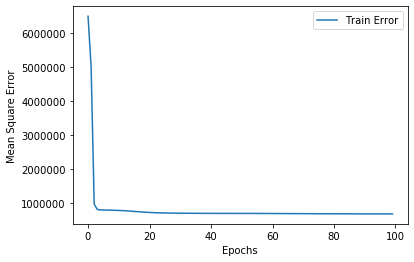

In [25]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.plot(range(cant_epochs), historia_modelo_2.history['mse'], label='Train Error')
plt.legend()

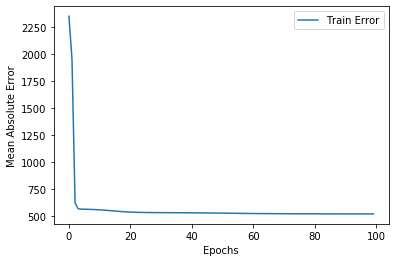

In [26]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.plot(range(cant_epochs), historia_modelo_2.history['mae'], label='Train Error')
plt.legend()

In [27]:
y_pred = modelo_2.predict(x_test_transform)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")

455/455 [==============================] - 1s 1ms/step
Error absoluto medio 553.9187378069531
Error cuadrático medio 639954.2783119738


La metrica del error cuadratico medio se encuentra en un rango entre 677.000 y 808.000, se incremento el rango.

Comparando la prediccion con el target de test, obtenemos como resultado un valor aprox 639.954, mayor que en el modelo anterior

## Modelo 3

Cambio el optimizador por Adam con un learning rate de 0.01

In [30]:
d_in=6
d_out=1

modelo_3 = keras.Sequential([
    keras.layers.Dense(6,input_shape=(d_in,), activation="relu"),
    
    keras.layers.Dense(d_out)])

In [31]:
modelo_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [32]:
modelo_3.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999), 
      loss='mae', 
      metrics=['mse','mae'], 
)

In [33]:
# Entrenamiento del modelo
cant_epochs = 100
historia_modelo_3 = modelo_3.fit(x_train_transform,y_train,epochs=cant_epochs,batch_size=10,verbose=2)

Epoch 1/100
5814/5814 - 8s - loss: 929.8745 - mse: 1798087.0000 - mae: 929.8745 - 8s/epoch - 1ms/step
Epoch 2/100
5814/5814 - 7s - loss: 562.9066 - mse: 792546.4375 - mae: 562.9066 - 7s/epoch - 1ms/step
Epoch 3/100
5814/5814 - 7s - loss: 554.0801 - mse: 778759.0000 - mae: 554.0801 - 7s/epoch - 1ms/step
Epoch 4/100
5814/5814 - 7s - loss: 550.9157 - mse: 771859.2500 - mae: 550.9157 - 7s/epoch - 1ms/step
Epoch 5/100
5814/5814 - 8s - loss: 549.2285 - mse: 769709.0000 - mae: 549.2285 - 8s/epoch - 1ms/step
Epoch 6/100
5814/5814 - 8s - loss: 548.1538 - mse: 765824.1875 - mae: 548.1538 - 8s/epoch - 1ms/step
Epoch 7/100
5814/5814 - 7s - loss: 547.3018 - mse: 762056.4375 - mae: 547.3018 - 7s/epoch - 1ms/step
Epoch 8/100
5814/5814 - 8s - loss: 546.3475 - mse: 758165.4375 - mae: 546.3475 - 8s/epoch - 1ms/step
Epoch 9/100
5814/5814 - 8s - loss: 545.6532 - mse: 755210.2500 - mae: 545.6532 - 8s/epoch - 1ms/step
Epoch 10/100
5814/5814 - 7s - loss: 543.9828 - mse: 748956.4375 - mae: 543.9828 - 7s/epoch

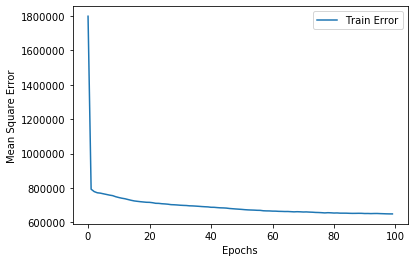

In [34]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.plot(range(cant_epochs), historia_modelo_3.history['mse'], label='Train Error')
plt.legend()

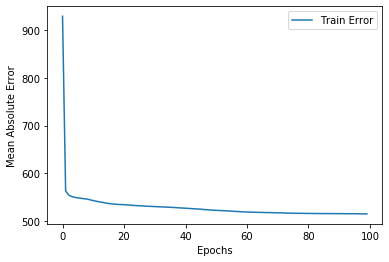

In [35]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.plot(range(cant_epochs), historia_modelo_3.history['mae'], label='Train Error')
plt.legend()

In [36]:
y_pred = modelo_3.predict(x_test_transform)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")

455/455 [==============================] - 1s 1ms/step
Error absoluto medio 628.1474362372534
Error cuadrático medio 755367.4572533136


La metrica del error cuadratico medio se encuentra en un rango entre 648.000 y 792.000, nuevamente el rango es mayor.

Obtenemos como resultado un valor aprox 755.367, es decir, que en este modelo se incremento mas.

In [ ]:
d_in=6
d_out=1

modelo_5 = keras.Sequential([
    
    keras.layers.Dense(6,input_shape=(d_in,), activation="relu"),
    #keras.layers.Dense(6,input_shape=(d_in,), activation="relu", kernel_initializer='normal'),
    
    keras.layers.Dense(3, activation="relu"),
    
    keras.layers.Dense(d_out)])

In [ ]:
modelo_5.summary()

In [ ]:
modelo_5.compile(
      #optimizer=keras.optimizers.SGD(learning_rate=0.01), 
      optimizer=keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9), 
      loss='mae', 
      metrics=['mse','mae'], 
)

In [ ]:
# Entrenamiento del modelo
modelo_5.fit(x_train_transform,y_train,epochs=100,batch_size=32,verbose=2)

In [ ]:
y_pred = modelo_5.predict(x_test_transform)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")

# Conclusion
----


Obtuvimos mejores metricas con el modelo 1 donde los resultados fueron:

+ Error absoluto medio (MAE): 549.96
+ Error cuadrático medio (MSE): 634414.3